In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

%matplotlib inline  
%config InlineBackend.figure_format = 'retina' 

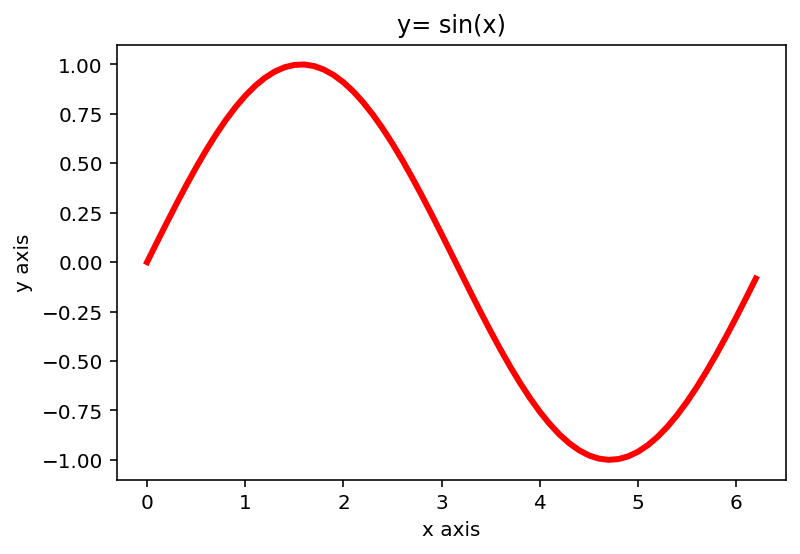

In [2]:
# example1 draw y = sin(x)
x= np.arange(0,6.28,0.1) # starts from 0, ends up at 6.28, interval 0.1
y=np.sin(x)
plt.plot(x,y, "red", linewidth=3.0) # red color, thicker line 
# add title 
plt.title("y= sin(x)")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show() # show the image 

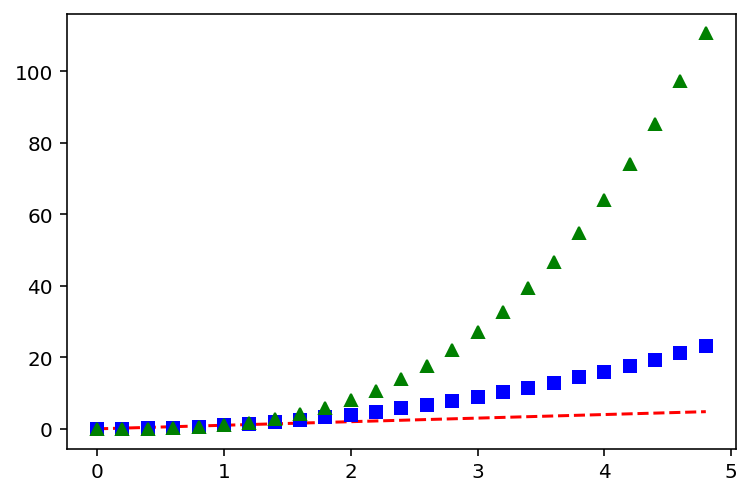

In [3]:
# example 2, draw y=x, y=x^2, y=x^3 in one plot 

x = np.arange(0., 5., 0.2)
plt.plot(x, x, 'r--', x, x**2, 'bs', x,x**3, 'g^')

## Visualization of one example of sales 

In [4]:
df = pd.read_excel("sample-salesv3.xlsx")  
df.head(10)

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55
5,714466,Trantow-Barrows,S2-77896,17,87.63,1489.71,2014-01-02 10:07:15
6,218895,Kulas Inc,B1-65551,2,31.10,62.20,2014-01-02 10:57:23
7,729833,Koepp Ltd,S1-30248,8,33.25,266.00,2014-01-03 06:32:11
8,714466,Trantow-Barrows,S1-50961,22,84.09,1849.98,2014-01-03 11:29:02
9,737550,"Fritsch, Russel and Anderson",S2-82423,14,81.92,1146.88,2014-01-03 19:07:37


In [5]:
# find the number of company names 
len(df.name.unique())

20

In [6]:
# Barton LLC has 82 transactions 
df[df.name == "Barton LLC"]

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
85,740150,Barton LLC,B1-50809,8,19.60,156.80,2014-01-20 01:48:47
91,740150,Barton LLC,B1-53102,1,68.06,68.06,2014-01-20 13:27:52
96,740150,Barton LLC,S2-16558,2,90.91,181.82,2014-01-21 21:21:01
99,740150,Barton LLC,B1-86481,20,30.41,608.20,2014-01-22 16:33:51
...,...,...,...,...,...,...,...
1346,740150,Barton LLC,S2-77896,30,41.40,1242.00,2014-11-22 05:10:19
1350,740150,Barton LLC,B1-53102,6,33.50,201.00,2014-11-23 00:20:34
1414,740150,Barton LLC,S2-10342,28,77.48,2169.44,2014-12-09 22:48:58
1422,740150,Barton LLC,S2-16558,25,17.65,441.25,2014-12-12 01:41:48


# Top 10 sales companies 

In [7]:
# reset the index and sort values by last 10
top10 = df.groupby('name')['ext price'].agg(['sum', 'count']).reset_index().sort_values(by='sum', ascending=False)[:10]

# rename the column names  
top10.rename(columns={'name': 'Name', 'sum': 'Sales', 'count': 'Purchases'}, inplace=True)

top10

,Name,Sales,Purchases
12,Kulas Inc,137351.96,94
18,White-Trantow,135841.99,86
17,Trantow-Barrows,123381.38,94
6,Jerde-Hilpert,112591.43,89
3,"Fritsch, Russel and Anderson",112214.71,81
0,Barton LLC,109438.50,82
19,Will LLC,104437.60,74
10,Koepp Ltd,103660.54,82
2,"Frami, Hills and Schmidt",103569.59,72
8,Keeling LLC,100934.30,74


# Line chart

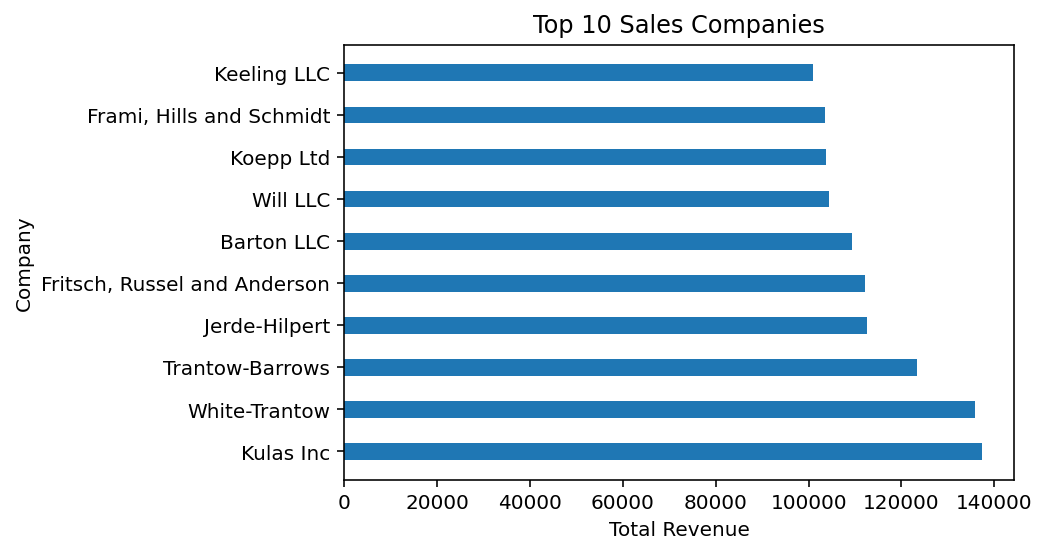

In [8]:

# barh means bar in horizontal， bar means vertical
plt.barh(np.arange(10), top10.Sales, height=0.4)

# add title
plt.title('Top 10 Sales Companies')
plt.xlabel('Total Revenue')
plt.ylabel('Company')

# 修改纵坐标和横坐标的刻度
plt.yticks(np.arange(10), top10.Name)

# show image
plt.show()

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

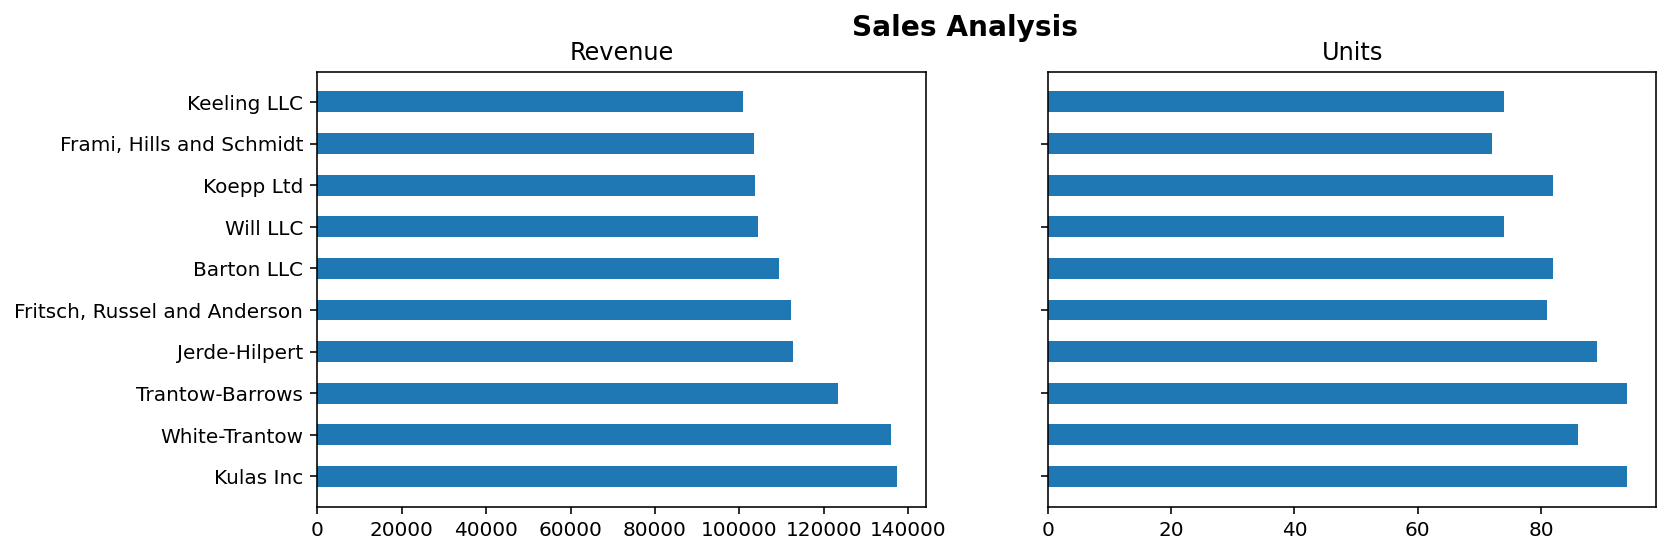

In [9]:
# draw two plots on one figure 
fig = plt.figure(figsize=(12,4))

fig.suptitle('Sales Analysis', fontsize=14, fontweight='bold')

# add first plot
ax1 = fig.add_subplot(121)  # 1 row, 2 columns, left side
plt.barh(np.arange(10), top10.Sales, height=0.5, tick_label=top10.Name)
plt.title('Revenue')

# 添加第二个子图
ax2 = fig.add_subplot(122)  # 1 row, 2 columns, right side 
plt.barh(np.arange(10), top10.Purchases, height=0.5)
plt.title('Units')

plt.yticks(visible=False)

# Pie chart 

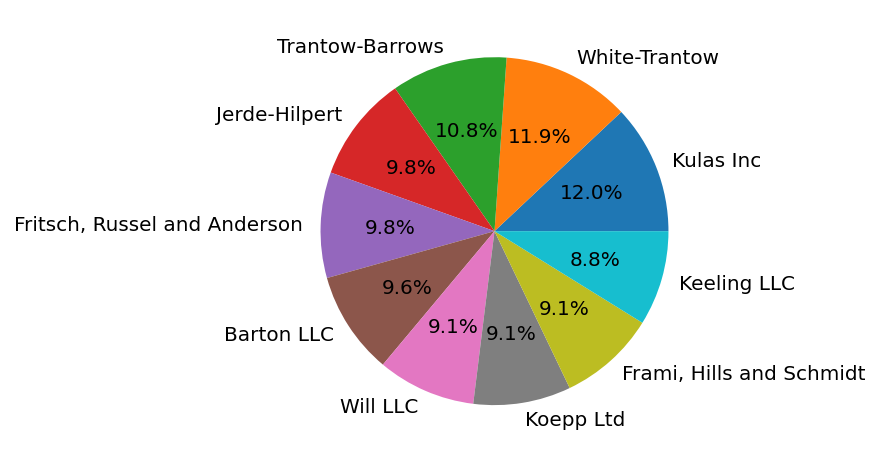

In [10]:
# draw a pie chart of sales 
plt.pie(top10.Sales, labels=top10.Name, autopct='%1.1f%%')
plt.show()

# Histogram

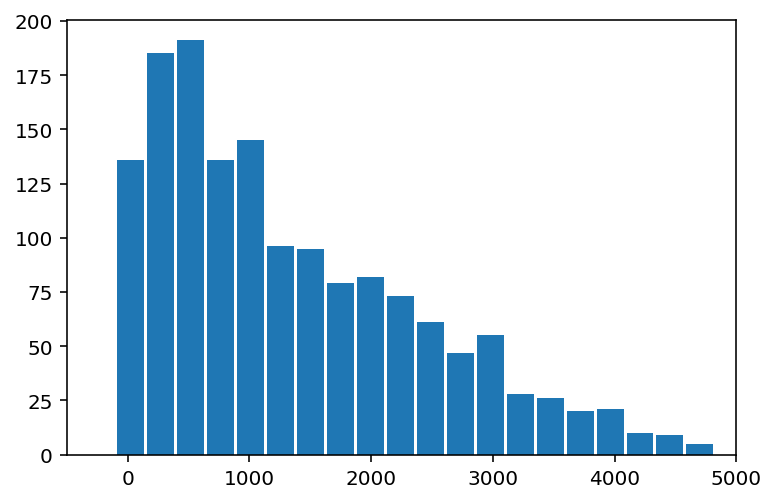

In [11]:
plt.hist(df['ext price'], bins=20, rwidth=0.9)

plt.xlim(-500, 5000)
plt.show()

# Seaborn 

In [12]:
import seaborn as sns

In [13]:
# load iris flower data
iris = pd.read_csv('iris.txt')
# add column names 
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv('iris.txt', names= col_names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


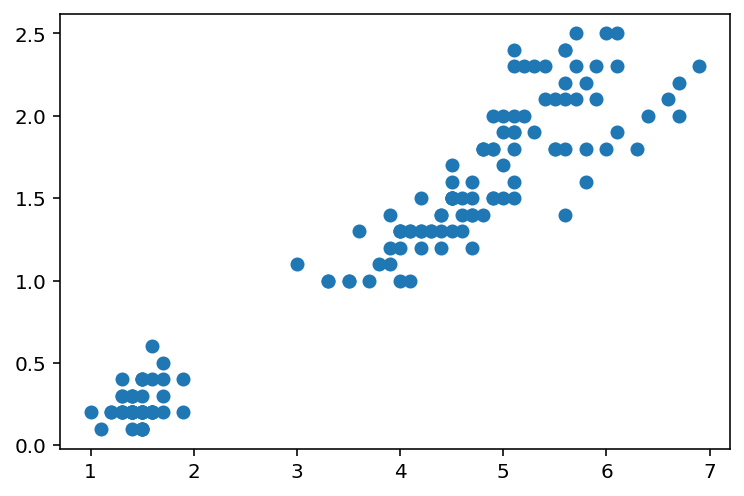

In [14]:
plt.scatter(iris.petal_length, iris.petal_width)

/Users/zhijiewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


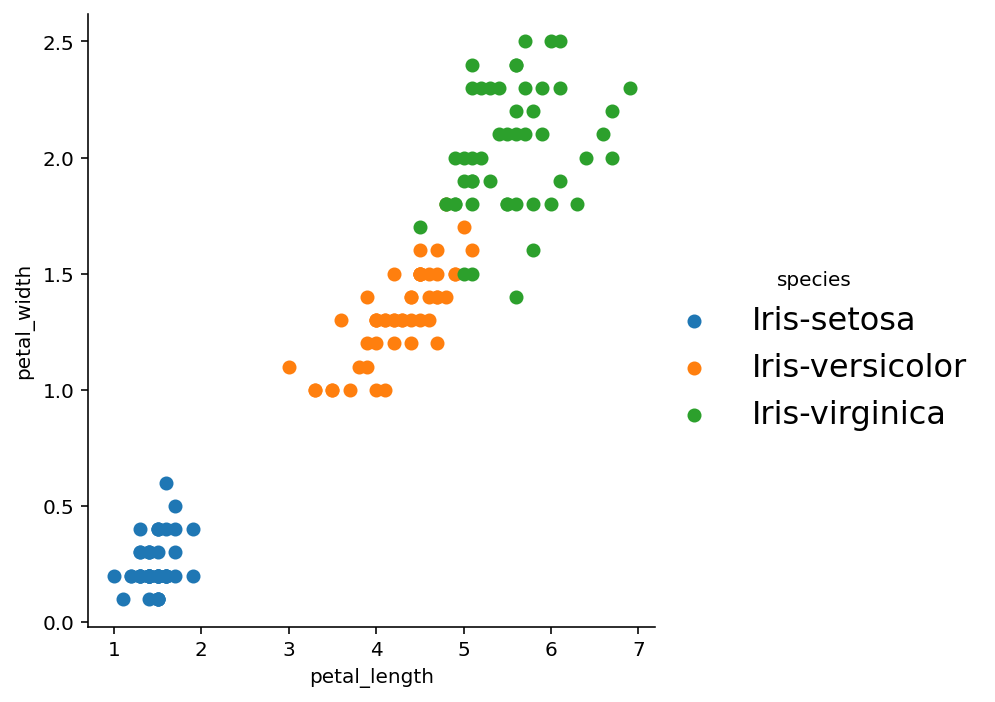

In [19]:
# specify three species 
sns.FacetGrid(iris, hue="species", size=5) 
.map(plt.scatter, "petal_length", "petal_width").add_legend(fontsize=16)


/Users/zhijiewei/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


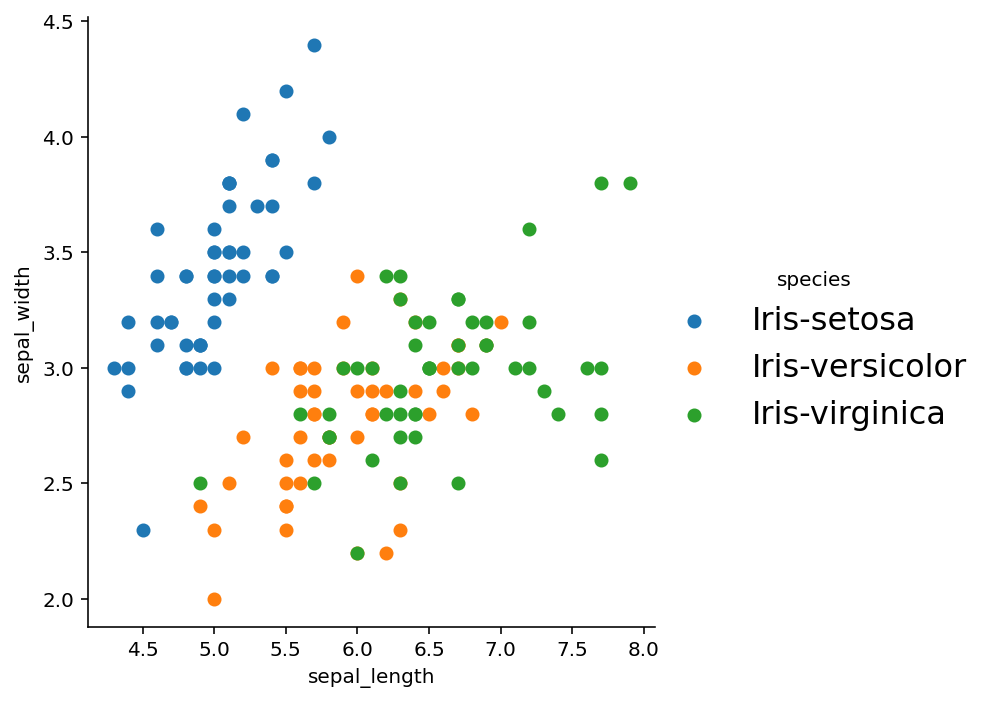

In [16]:
sns.FacetGrid(data=iris, size=5, hue='species').map(plt.scatter, 'sepal_length', 'sepal_width').add_legend(fontsize=16)



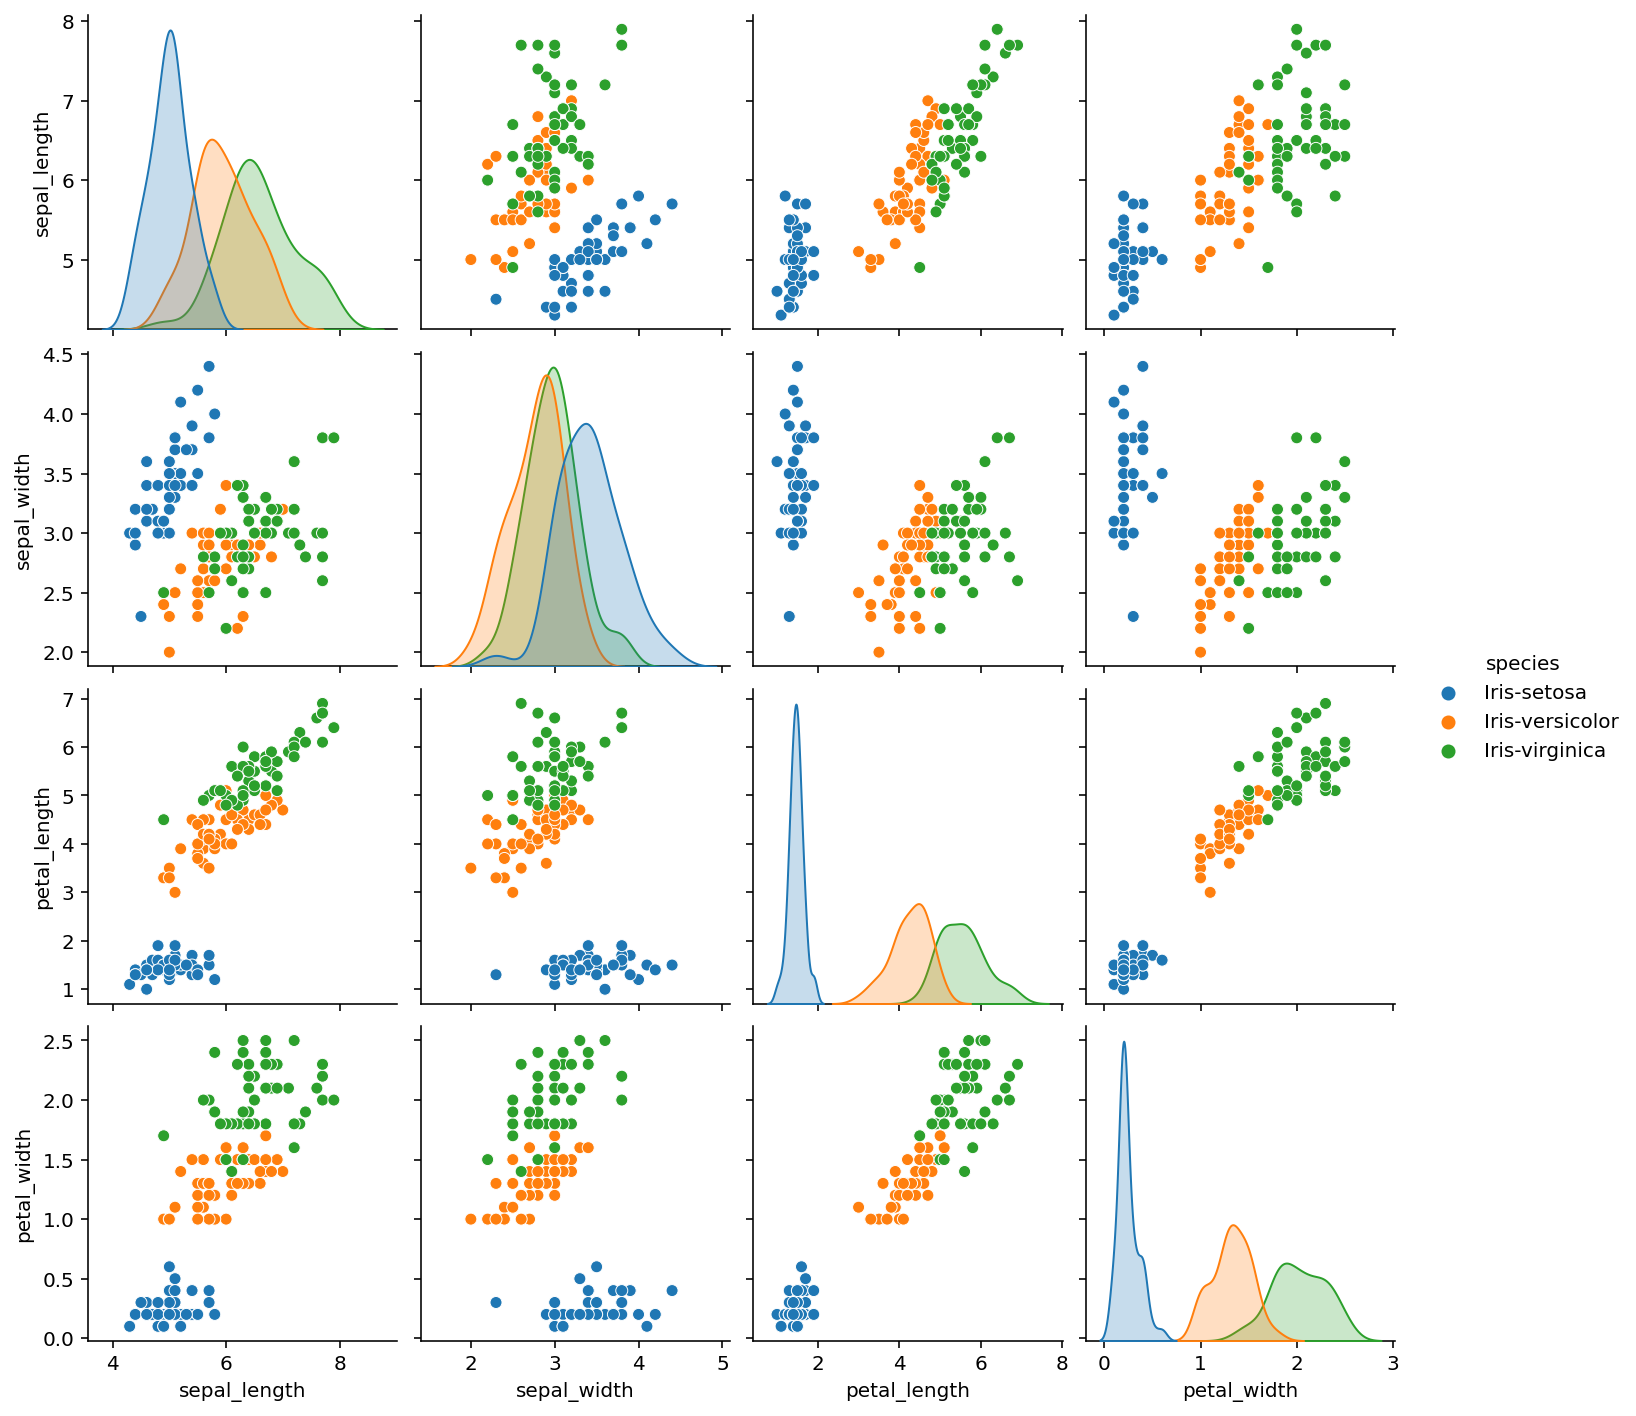

In [17]:
sns.pairplot(iris, hue="species")